
## Template Code

In [1]:
import sys, os

sys.executable

'/home/sayantan/anaconda2/envs/py36/bin/python'

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 
%load_ext rpy2.ipython


## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



modify the ast_note_interactivity kernel option to see the value of multiple statements at once.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
raw_df = pd.read_excel( "./IMB 485 Deans Dilemma Data.xlsx", sheet_name='Placement')

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.columns = raw_df.columns.str.lower().str.replace('*', '_')
raw_df.columns = raw_df.columns.str.lower().str.replace('-', '_')

raw_df.head()

raw_df.columns


,slno,gender,gender_b,percent_ssc,board_ssc,board_cbse,board_icse,percent_hsc,board_hsc,stream_hsc,...,percentile_et,percent_mba,s_test_score,specialization_mba,marks_communication,marks_projectwork,marks_boca,placement,placement_b,salary
0,1,M,0,62.00,Others,0,0,88.00,Others,Commerce,...,55.0,58.80,55.0,Marketing & HR,50,65,74,Placed,1,270000
1,2,M,0,76.33,ICSE,0,1,75.33,Others,Science,...,86.5,66.28,86.5,Marketing & Finance,69,70,75,Placed,1,200000
2,3,M,0,72.00,Others,0,0,78.00,Others,Commerce,...,0.0,52.91,0.0,Marketing & Finance,50,61,59,Placed,1,240000
3,4,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,...,75.0,57.80,75.0,Marketing & Finance,54,66,62,Placed,1,250000
4,5,M,0,61.00,CBSE,1,0,55.00,ISC,Science,...,66.0,59.43,66.0,Marketing & HR,52,65,67,Placed,1,180000


Index(['slno', 'gender', 'gender_b', 'percent_ssc', 'board_ssc', 'board_cbse',
       'board_icse', 'percent_hsc', 'board_hsc', 'stream_hsc',
       'percent_degree', 'course_degree', 'degree_engg', 'experience_yrs',
       'entrance_test', 's_test', 'percentile_et', 'percent_mba',
       's_test_score', 'specialization_mba', 'marks_communication',
       'marks_projectwork', 'marks_boca', 'placement', 'placement_b',
       'salary'],
      dtype='object')

In [5]:
catColumns = [x for x in raw_df.columns if raw_df[x].dtype == 'object']
catColumns
numColumns = set(raw_df.columns) - set(catColumns + ['slno'])
numColumns

['gender',
 'board_ssc',
 'board_hsc',
 'stream_hsc',
 'course_degree',
 'entrance_test',
 'specialization_mba',
 'placement']

{'board_cbse',
 'board_icse',
 'degree_engg',
 'experience_yrs',
 'gender_b',
 'marks_boca',
 'marks_communication',
 'marks_projectwork',
 'percent_degree',
 'percent_hsc',
 'percent_mba',
 'percent_ssc',
 'percentile_et',
 'placement_b',
 's_test',
 's_test_score',
 'salary'}

/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


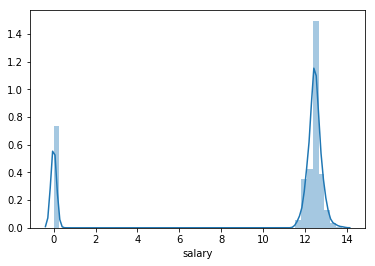

In [6]:
sn.distplot(np.log1p(raw_df['salary']))

Dropping SLNo and Candidate.Ref as these will not be used for any analysis or model building.

In [7]:
#?raw_df.drop()

In [8]:
if set(['slno']).issubset(raw_df.columns):
    raw_df.drop(['slno'],axis=1, inplace=True)
    
raw_df.head()

,gender,gender_b,percent_ssc,board_ssc,board_cbse,board_icse,percent_hsc,board_hsc,stream_hsc,percent_degree,...,percentile_et,percent_mba,s_test_score,specialization_mba,marks_communication,marks_projectwork,marks_boca,placement,placement_b,salary
0,M,0,62.00,Others,0,0,88.00,Others,Commerce,52.00,...,55.0,58.80,55.0,Marketing & HR,50,65,74,Placed,1,270000
1,M,0,76.33,ICSE,0,1,75.33,Others,Science,75.48,...,86.5,66.28,86.5,Marketing & Finance,69,70,75,Placed,1,200000
2,M,0,72.00,Others,0,0,78.00,Others,Commerce,66.63,...,0.0,52.91,0.0,Marketing & Finance,50,61,59,Placed,1,240000
3,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,58.00,...,75.0,57.80,75.0,Marketing & Finance,54,66,62,Placed,1,250000
4,M,0,61.00,CBSE,1,0,55.00,ISC,Science,54.00,...,66.0,59.43,66.0,Marketing & HR,52,65,67,Placed,1,180000



### 2. Structure of the dataset



In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 25 columns):
gender                 391 non-null object
gender_b               391 non-null int64
percent_ssc            391 non-null float64
board_ssc              391 non-null object
board_cbse             391 non-null int64
board_icse             391 non-null int64
percent_hsc            391 non-null float64
board_hsc              391 non-null object
stream_hsc             391 non-null object
percent_degree         391 non-null float64
course_degree          391 non-null object
degree_engg            391 non-null int64
experience_yrs         391 non-null int64
entrance_test          324 non-null object
s_test                 391 non-null int64
percentile_et          391 non-null float64
percent_mba            391 non-null float64
s_test_score           391 non-null float64
specialization_mba     391 non-null object
marks_communication    391 non-null int64
marks_projectwork      391 non-null 

In [10]:
raw_df.placement.value_counts()
raw_df.describe(include='all').transpose()
#raw_df.describe().transpose()

Placed        312
Not Placed     79
Name: placement, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,391,2,M,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_b,391,NaN,NaN,NaN,0.324808,0.468903,0,0,0,1,1
percent_ssc,391,NaN,NaN,NaN,64.6524,10.9604,37,56,64.5,74,87.2
board_ssc,391,3,Others,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
board_cbse,391,NaN,NaN,NaN,0.289003,0.45388,0,0,0,1,1
board_icse,391,NaN,NaN,NaN,0.196931,0.398189,0,0,0,0,1
percent_hsc,391,NaN,NaN,NaN,63.7953,11.4177,40,54,63,72,94.7
board_hsc,391,3,Others,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream_hsc,391,3,Commerce,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_degree,391,NaN,NaN,NaN,62.9836,8.91615,35,57.525,63,69,89


To get a help on the features of a object

In [11]:
raw_df.shape
raw_df.isnull().sum()
# impute missing entrance_test with others

raw_df.loc[raw_df['entrance_test'].isnull(), 'entrance_test'] = 'NotAvailable'

(391, 25)

gender                  0
gender_b                0
percent_ssc             0
board_ssc               0
board_cbse              0
board_icse              0
percent_hsc             0
board_hsc               0
stream_hsc              0
percent_degree          0
course_degree           0
degree_engg             0
experience_yrs          0
entrance_test          67
s_test                  0
percentile_et           0
percent_mba             0
s_test_score            0
specialization_mba      0
marks_communication     0
marks_projectwork       0
marks_boca              0
placement               0
placement_b             0
salary                  0
dtype: int64

### 2. Summarizing the dataset
Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed. The *dropna()* function is used for row wise deletion of missing value. The axis = 0 means row-wise, 1 means column wise.


In [12]:
filter_df = raw_df.copy()#.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
filter_df.shape
list(filter_df.columns )

(391, 25)

['gender',
 'gender_b',
 'percent_ssc',
 'board_ssc',
 'board_cbse',
 'board_icse',
 'percent_hsc',
 'board_hsc',
 'stream_hsc',
 'percent_degree',
 'course_degree',
 'degree_engg',
 'experience_yrs',
 'entrance_test',
 's_test',
 'percentile_et',
 'percent_mba',
 's_test_score',
 'specialization_mba',
 'marks_communication',
 'marks_projectwork',
 'marks_boca',
 'placement',
 'placement_b',
 'salary']

In [13]:
filter_df.describe()

,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,0.324808,64.652353,0.289003,0.196931,63.795294,62.983606,0.094629,0.478261,0.828645,54.934962,61.667698,54.934962,60.539642,68.363171,64.378517,0.797954,219078.260870
std,0.468903,10.960426,0.453880,0.398189,11.417726,8.916152,0.293077,0.667112,0.377302,31.168264,5.854399,31.168264,8.824084,7.145095,9.582834,0.402041,138311.647036
min,0.000000,37.000000,0.000000,0.000000,40.000000,35.000000,0.000000,0.000000,0.000000,0.000000,50.830000,0.000000,50.000000,50.000000,50.000000,0.000000,0.000000
25%,0.000000,56.000000,0.000000,0.000000,54.000000,57.525000,0.000000,0.000000,1.000000,41.190000,57.195000,41.190000,53.000000,64.000000,57.000000,1.000000,172800.000000
50%,0.000000,64.500000,0.000000,0.000000,63.000000,63.000000,0.000000,0.000000,1.000000,62.000000,61.010000,62.000000,58.000000,69.000000,63.000000,1.000000,240000.000000
75%,1.000000,74.000000,1.000000,0.000000,72.000000,69.000000,0.000000,1.000000,1.000000,78.000000,66.020000,78.000000,67.000000,74.000000,72.500000,1.000000,300000.000000
max,1.000000,87.200000,1.000000,1.000000,94.700000,89.000000,1.000000,3.000000,1.000000,98.690000,77.890000,98.690000,88.000000,87.000000,96.000000,1.000000,940000.000000


In [14]:
# Converting Salary

#filter_df['salary'] = np.log1p(filter_df['salary'])

We will first start by printing the unique labels in categorical features

In [15]:
for f in catColumns:
    print("\nThe unique labels in {} is {}\n".format(f, filter_df[f].unique()))
    print("The values in {} is \n{}\n".format(f,  filter_df[f].value_counts()))



The unique labels in gender is ['M' 'F']

The values in gender is 
M    264
F    127
Name: gender, dtype: int64


The unique labels in board_ssc is ['Others' 'ICSE' 'CBSE']

The values in board_ssc is 
Others    201
CBSE      113
ICSE       77
Name: board_ssc, dtype: int64


The unique labels in board_hsc is ['Others' 'CBSE' 'ISC']

The values in board_hsc is 
Others    247
CBSE       96
ISC        48
Name: board_hsc, dtype: int64


The unique labels in stream_hsc is ['Commerce' 'Science' 'Arts']

The values in stream_hsc is 
Commerce    222
Science     151
Arts         18
Name: stream_hsc, dtype: int64


The unique labels in course_degree is ['Science' 'Computer Applications' 'Engineering' 'Management' 'Commerce'
 'Others' 'Arts']

The values in course_degree is 
Management               163
Commerce                 117
Engineering               37
Computer Applications     32
Science                   24
Arts                      13
Others                     5
Name: course_degree, 

Looking at the feature **entrance_test** we will merge low val categories

**course_degree** merge others and Arts

In [16]:
filter_df['entrance_test']=np.where(filter_df['entrance_test'].isin(['PGCET', 'GCET', 'XAT', 'G-SAT', 'G-MAT']), 
                                    'Others', filter_df['entrance_test'])
filter_df.entrance_test.value_counts()

filter_df['course_degree']=np.where(filter_df['course_degree'].isin(['Others', 'Arts']), 
                                    'Others', filter_df['course_degree'])
filter_df.course_degree.value_counts()




MAT             265
NotAvailable     67
K-MAT            24
CAT              22
Others           13
Name: entrance_test, dtype: int64

Management               163
Commerce                 117
Engineering               37
Computer Applications     32
Science                   24
Others                    18
Name: course_degree, dtype: int64

We will use **groupby** function of pandas to get deeper insights of the behaviour of people **Joining** or **Not Joining** the company. We will write a generic function to report the mean by any categorical variable.

In [17]:
def group_by (categorical_features):
    return filter_df.groupby(categorical_features).mean()#agg(['mean', 'median', 'std', 'value_counts'])



In [18]:
for c in catColumns:
    group_by(c)

,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
gender,,,,,,,,,,,,,,,,,
F,1.0,67.315669,0.291339,0.23622,66.156850,65.545906,0.078740,0.480315,0.818898,55.565118,64.343780,55.565118,63.740157,70.433071,67.590551,0.763780,193288.188976
M,0.0,63.371136,0.287879,0.17803,62.659242,61.750985,0.102273,0.477273,0.833333,54.631818,60.380341,54.631818,59.000000,67.367424,62.833333,0.814394,231484.848485


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
board_ssc,,,,,,,,,,,,,,,,,
CBSE,0.327434,62.922389,1.0,0.0,63.759823,63.225044,0.070796,0.469027,0.831858,57.069558,60.835664,57.069558,59.097345,68.283186,64.486726,0.831858,230253.097345
ICSE,0.389610,65.403896,0.0,1.0,68.681429,64.178182,0.077922,0.558442,0.818182,56.752208,62.810779,56.752208,63.142857,68.805195,64.467532,0.779221,217701.298701
Others,0.298507,65.337015,0.0,0.0,61.943433,62.390249,0.114428,0.452736,0.830846,53.038756,61.697562,53.038756,60.353234,68.238806,64.283582,0.786070,213323.383085


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
board_hsc,,,,,,,,,,,,,,,,,
CBSE,0.354167,64.384479,0.833333,0.072917,64.091771,62.547500,0.072917,0.447917,0.843750,57.191042,61.077604,57.191042,59.500000,67.895833,64.916667,0.843750,227975.000000
ISC,0.354167,64.334792,0.083333,0.812500,67.300417,63.203542,0.062500,0.583333,0.770833,53.051458,61.386250,53.051458,60.604167,68.416667,63.125000,0.770833,220395.833333
Others,0.307692,64.818178,0.117409,0.125506,62.998907,63.110364,0.109312,0.469636,0.834008,54.424130,61.951741,54.424130,60.931174,68.534413,64.412955,0.785425,215364.372470


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
stream_hsc,,,,,,,,,,,,,,,,,
Arts,0.555556,55.932222,0.277778,0.222222,64.048333,58.096111,0.000000,0.888889,0.888889,51.673333,61.211667,51.673333,57.944444,67.611111,64.722222,0.777778,179944.444444
Commerce,0.315315,63.164820,0.288288,0.229730,66.518108,62.408649,0.004505,0.423423,0.815315,52.889955,61.340135,52.889955,60.081081,68.513514,64.027027,0.788288,217394.594595
Science,0.311258,67.878808,0.291391,0.145695,59.762053,64.411523,0.238411,0.509934,0.841060,58.330331,62.203642,58.330331,61.523179,68.231788,64.854305,0.814570,226218.543046


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
course_degree,,,,,,,,,,,,,,,,,
Commerce,0.307692,63.214957,0.273504,0.264957,66.618205,61.415897,0.0,0.478632,0.777778,52.506325,61.538120,52.506325,60.410256,69.358974,64.495726,0.803419,231170.940171
Computer Applications,0.281250,67.252813,0.187500,0.156250,58.672812,68.808750,0.0,0.531250,0.875000,55.956250,61.570000,55.956250,61.562500,68.531250,67.937500,0.750000,206125.000000
Engineering,0.270270,72.335676,0.216216,0.162162,64.970811,61.990811,1.0,0.567568,0.837838,58.705946,63.962973,58.705946,63.351351,69.405405,66.594595,0.810811,263675.675676
Management,0.337423,63.144233,0.349693,0.147239,62.724417,63.374049,0.0,0.368098,0.865031,55.476626,61.256933,55.476626,60.196319,67.674847,62.779141,0.791411,203991.411043
Others,0.555556,61.333333,0.166667,0.388889,61.166667,58.101667,0.0,0.833333,0.722222,50.913333,60.283889,50.913333,56.500000,66.000000,63.722222,0.777778,188277.777778
Science,0.291667,69.079167,0.291667,0.166667,64.295833,65.399583,0.0,0.750000,0.833333,58.936667,62.718750,58.936667,60.833333,68.125000,67.000000,0.875000,234208.333333


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
entrance_test,,,,,,,,,,,,,,,,,
CAT,0.227273,68.082727,0.272727,0.227273,66.525909,64.783636,0.090909,0.227273,1.0,56.444091,63.541364,56.444091,62.681818,71.454545,64.363636,0.818182,261409.090909
K-MAT,0.333333,65.344583,0.125000,0.208333,63.158333,63.880000,0.125000,0.458333,1.0,75.797083,61.800417,75.797083,63.750000,68.166667,62.500000,0.833333,279375.000000
MAT,0.332075,64.966943,0.309434,0.192453,64.265925,63.570792,0.094340,0.467925,1.0,68.379887,61.877208,68.379887,60.769811,68.581132,64.513208,0.807547,214062.641509
NotAvailable,0.343284,62.615970,0.283582,0.208955,62.757164,60.647164,0.089552,0.582090,0.0,0.000000,60.590448,0.000000,58.582090,66.417910,64.119403,0.761194,207776.119403
Others,0.230769,61.651538,0.230769,0.153846,56.106923,58.354615,0.076923,0.615385,1.0,22.923077,59.533077,22.923077,56.384615,69.076923,66.461538,0.692308,196615.384615


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
specialization_mba,,,,,,,,,,,,,,,,,
Marketing & Finance,0.297297,64.977027,0.274775,0.220721,65.510360,63.340180,0.085586,0.486486,0.819820,56.035856,62.023063,56.035856,60.792793,69.527027,64.779279,0.797297,230441.441441
Marketing & HR,0.378205,64.107885,0.314103,0.179487,61.628590,62.731218,0.089744,0.493590,0.833333,53.869103,61.388013,53.869103,60.230769,67.012821,64.230769,0.807692,205298.717949
Marketing & IB,0.153846,65.641538,0.230769,0.000000,60.507692,59.923077,0.307692,0.153846,0.923077,48.925385,58.955385,48.925385,59.923077,64.692308,59.307692,0.692308,190384.615385


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,percent_mba,s_test_score,marks_communication,marks_projectwork,marks_boca,placement_b,salary
placement,,,,,,,,,,,,,,,,,
Not Placed,0.379747,60.986835,0.240506,0.215190,62.611519,62.061266,0.088608,0.392405,0.797468,46.834937,60.742278,46.834937,60.354430,66.860759,63.063291,0.0,0.0
Placed,0.310897,65.580481,0.301282,0.192308,64.095032,63.217147,0.096154,0.500000,0.836538,56.985929,61.902019,56.985929,60.586538,68.743590,64.711538,1.0,274550.0


### 3. Visualizing the Data

#### 3a. Visualizing the Data using pandas

In [19]:
def hist_plot(data, group_by, xlabel,ylabel):
    pd.crosstab(data,group_by).plot(kind='density')
    plt.xlabel(xlabel, size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.title('Plot', size = 18)
    plt.grid(True)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((0,x2,y1,y2))
    plt.show()
    #plt.subplot(1, 2)

gender percent_ssc


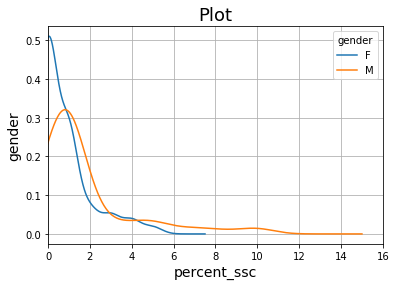

gender percent_hsc


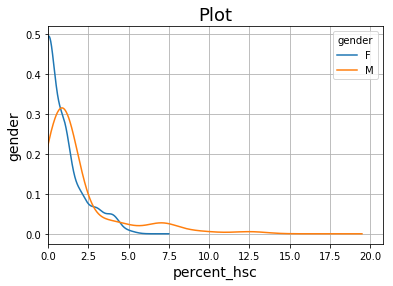

gender percent_degree


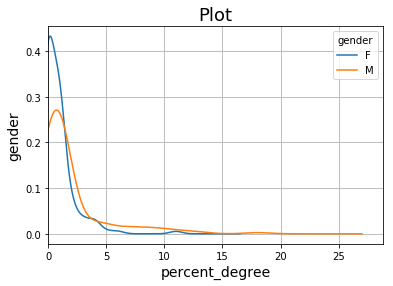

gender percentile_et


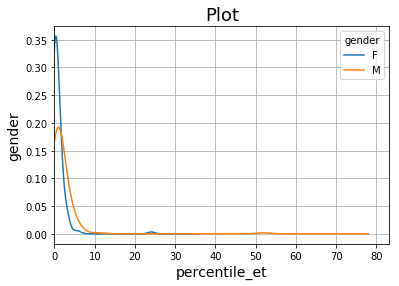

gender percent_mba


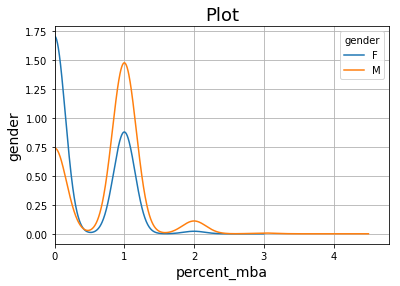

gender marks_communication


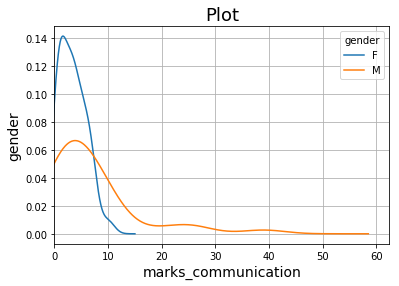

gender marks_projectwork


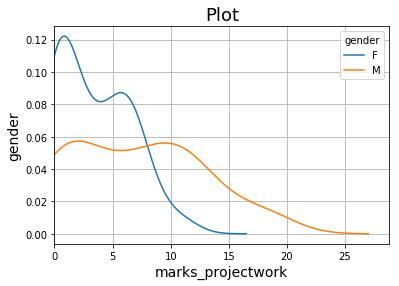

gender marks_boca


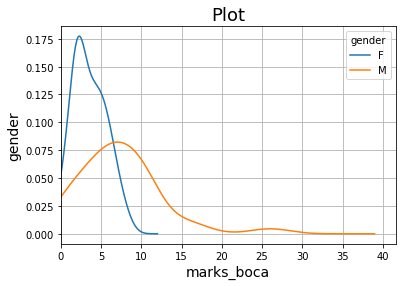

board_ssc percent_ssc


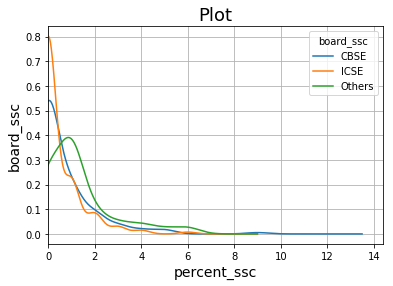

board_ssc percent_hsc


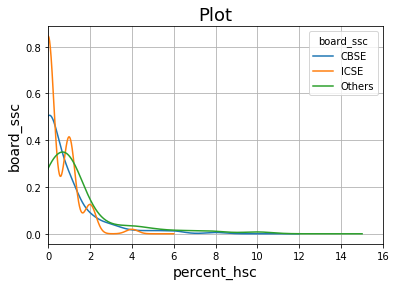

board_ssc percent_degree


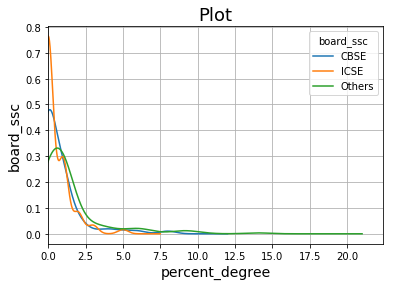

board_ssc percentile_et


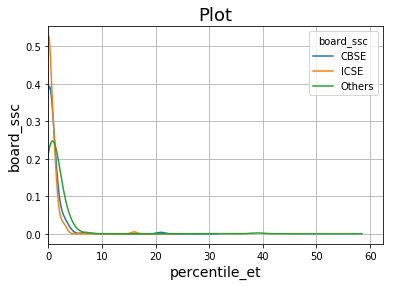

board_ssc percent_mba


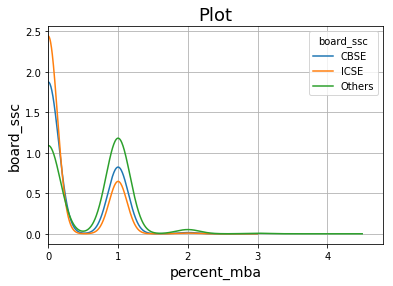

board_ssc marks_communication


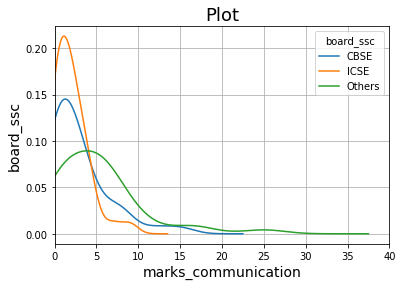

board_ssc marks_projectwork


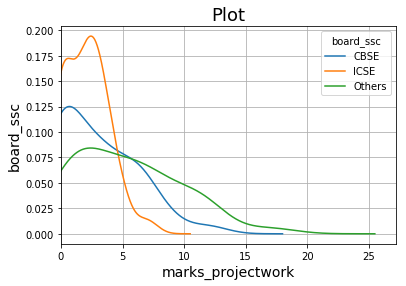

board_ssc marks_boca


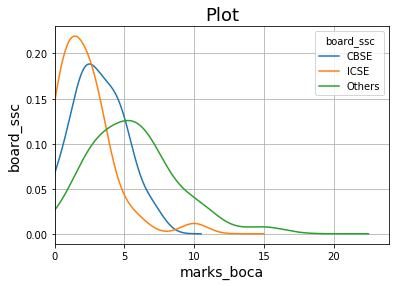

board_hsc percent_ssc


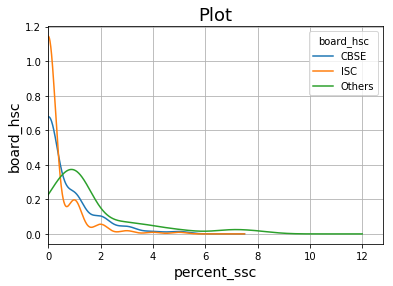

board_hsc percent_hsc


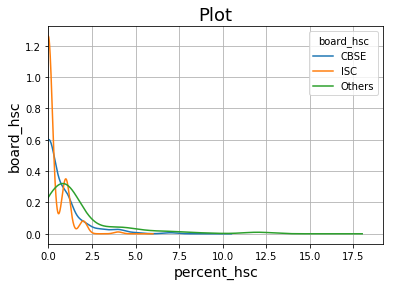

board_hsc percent_degree


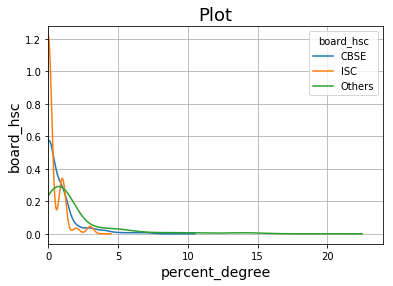

board_hsc percentile_et


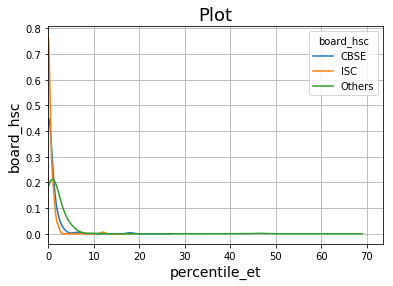

board_hsc percent_mba


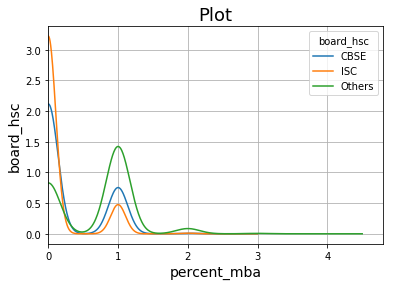

board_hsc marks_communication


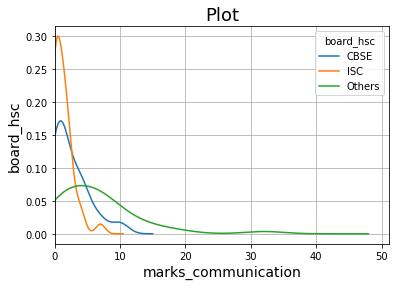

board_hsc marks_projectwork


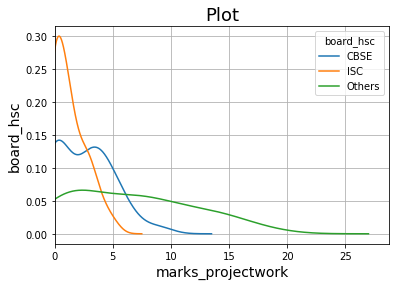

board_hsc marks_boca


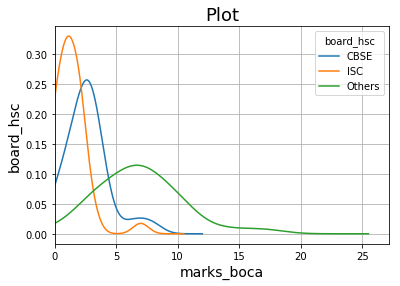

stream_hsc percent_ssc


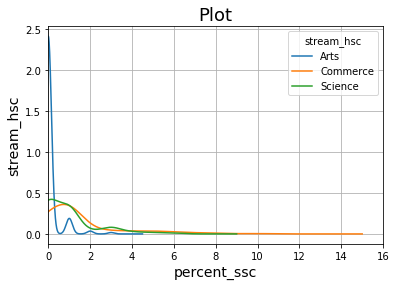

stream_hsc percent_hsc


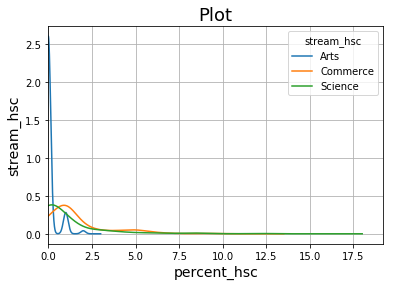

stream_hsc percent_degree


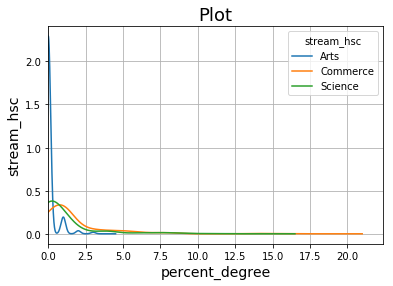

stream_hsc percentile_et


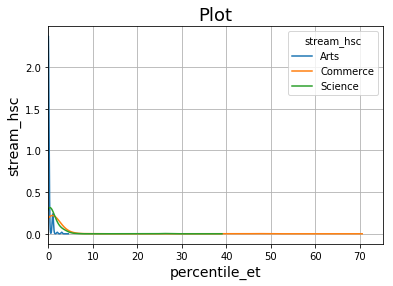

stream_hsc percent_mba


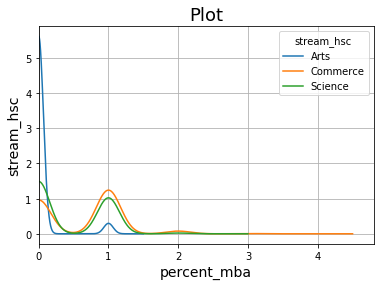

stream_hsc marks_communication


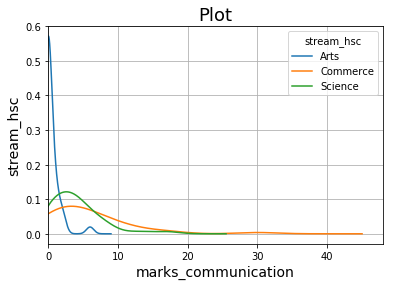

stream_hsc marks_projectwork


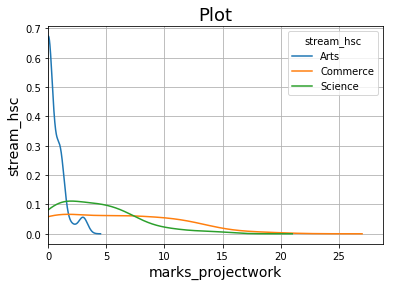

stream_hsc marks_boca


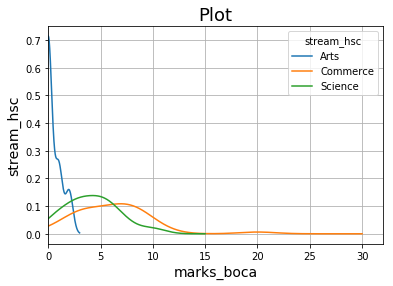

course_degree percent_ssc


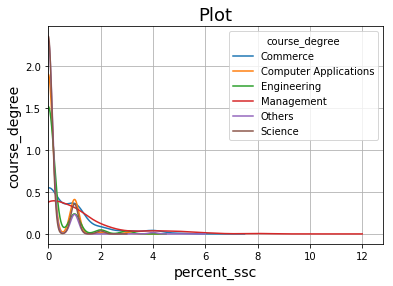

course_degree percent_hsc


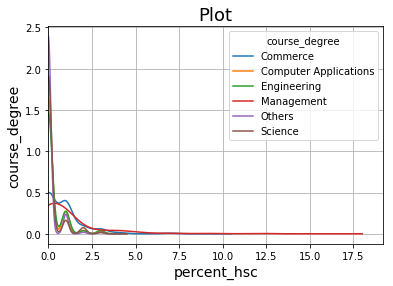

course_degree percent_degree


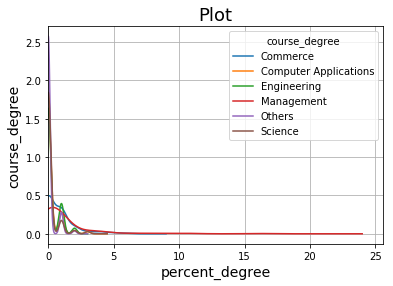

course_degree percentile_et


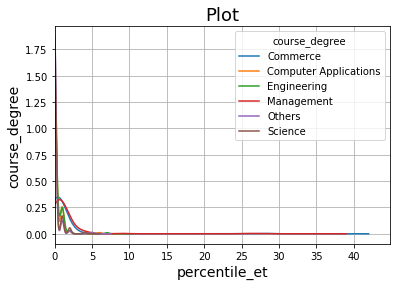

course_degree percent_mba


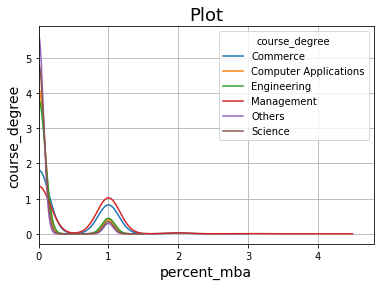

course_degree marks_communication


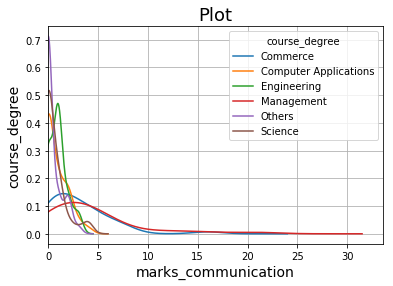

course_degree marks_projectwork


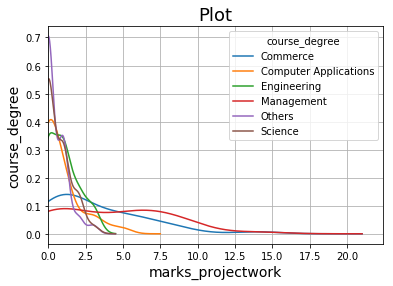

course_degree marks_boca


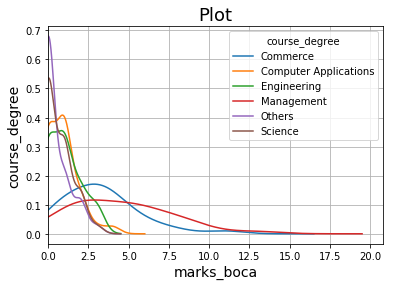

entrance_test percent_ssc


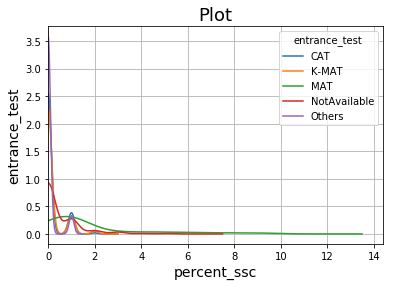

entrance_test percent_hsc


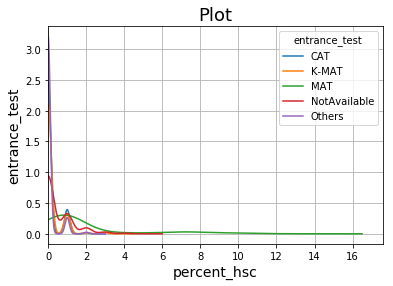

entrance_test percent_degree


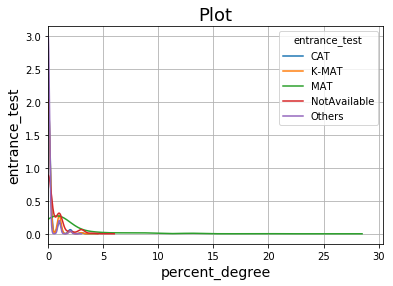

entrance_test percentile_et


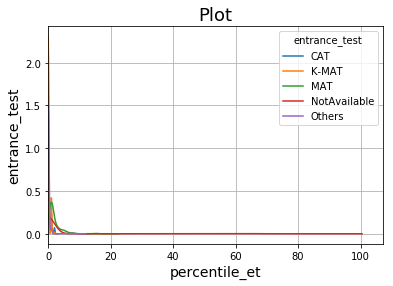

entrance_test percent_mba


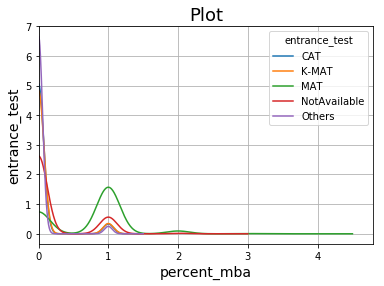

entrance_test marks_communication


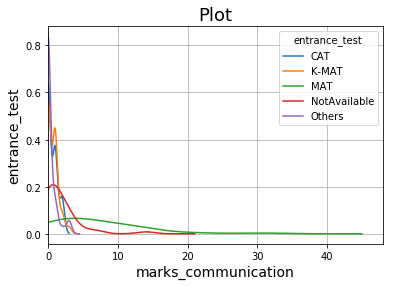

entrance_test marks_projectwork


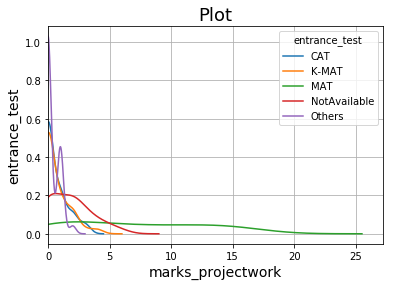

entrance_test marks_boca


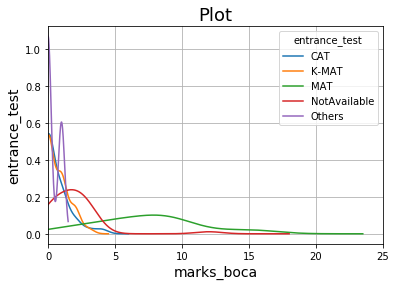

specialization_mba percent_ssc


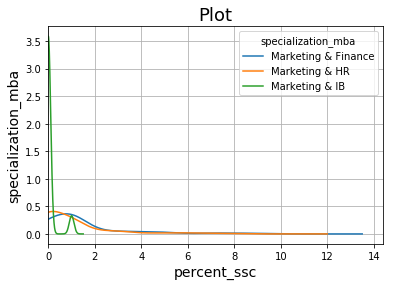

specialization_mba percent_hsc


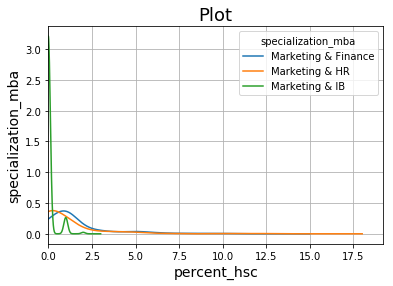

specialization_mba percent_degree


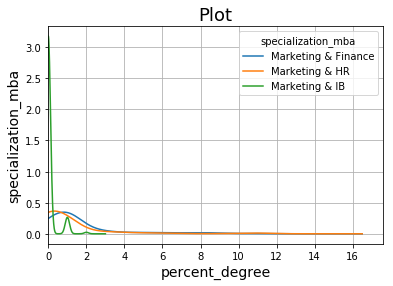

specialization_mba percentile_et


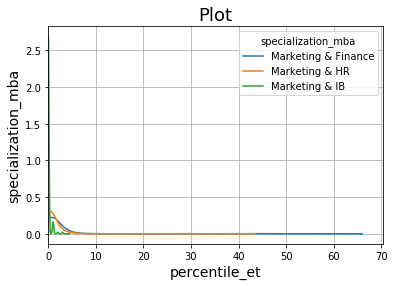

specialization_mba percent_mba


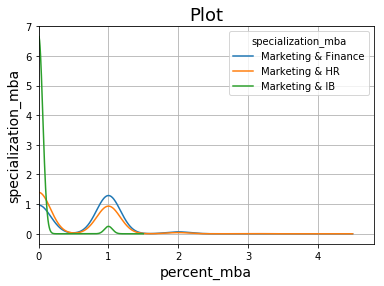

specialization_mba marks_communication


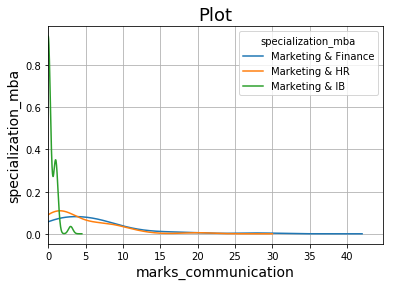

specialization_mba marks_projectwork


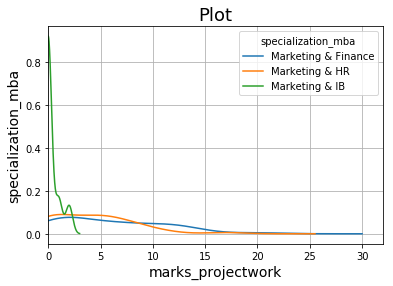

specialization_mba marks_boca


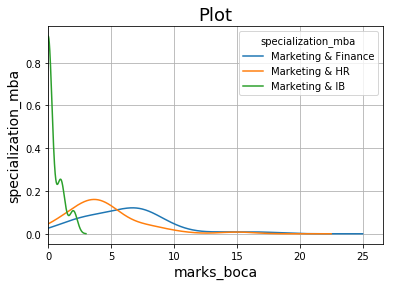

placement percent_ssc


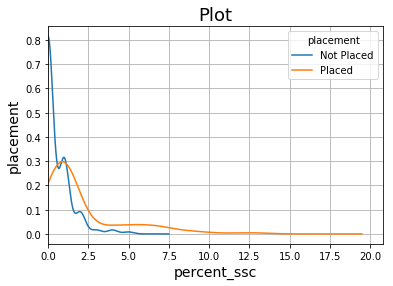

placement percent_hsc


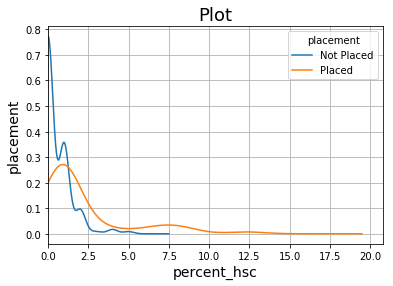

placement percent_degree


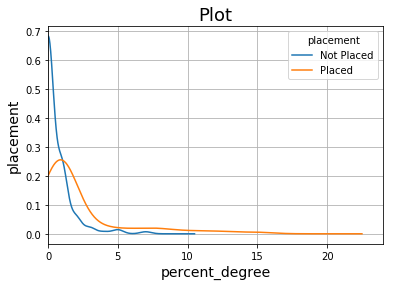

placement percentile_et


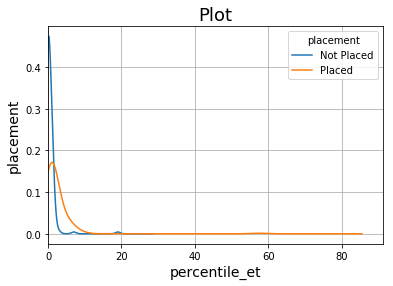

placement percent_mba


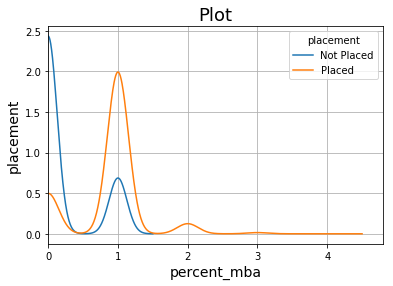

placement marks_communication


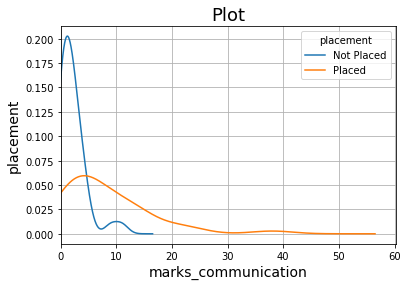

placement marks_projectwork


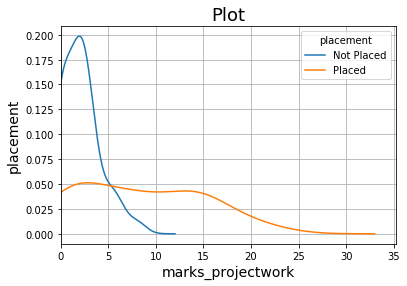

placement marks_boca


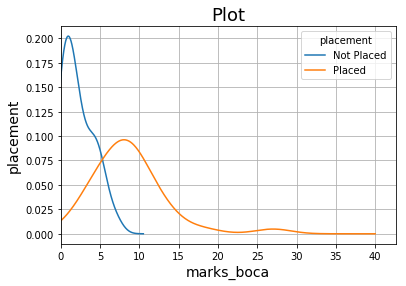

In [20]:
numerical_features_set = ['percent_ssc', 'percent_hsc', 'percent_degree',
                          'percentile_et', 'percent_mba', 'marks_communication',
                          'marks_projectwork', 'marks_boca'
]
categorical_features_set = catColumns

for c in categorical_features_set:
    for n in numerical_features_set:
        print(c, n)
        hist_plot(filter_df[n], filter_df[c], n,c)

#### 3b. Visulaztion using seaborn

The details about seaborn package can be found at: https://seaborn.pydata.org/

To do a simple scatter plot, we need to pass the pandas dataframe to seaborn pairplot function. The default output is as belows:

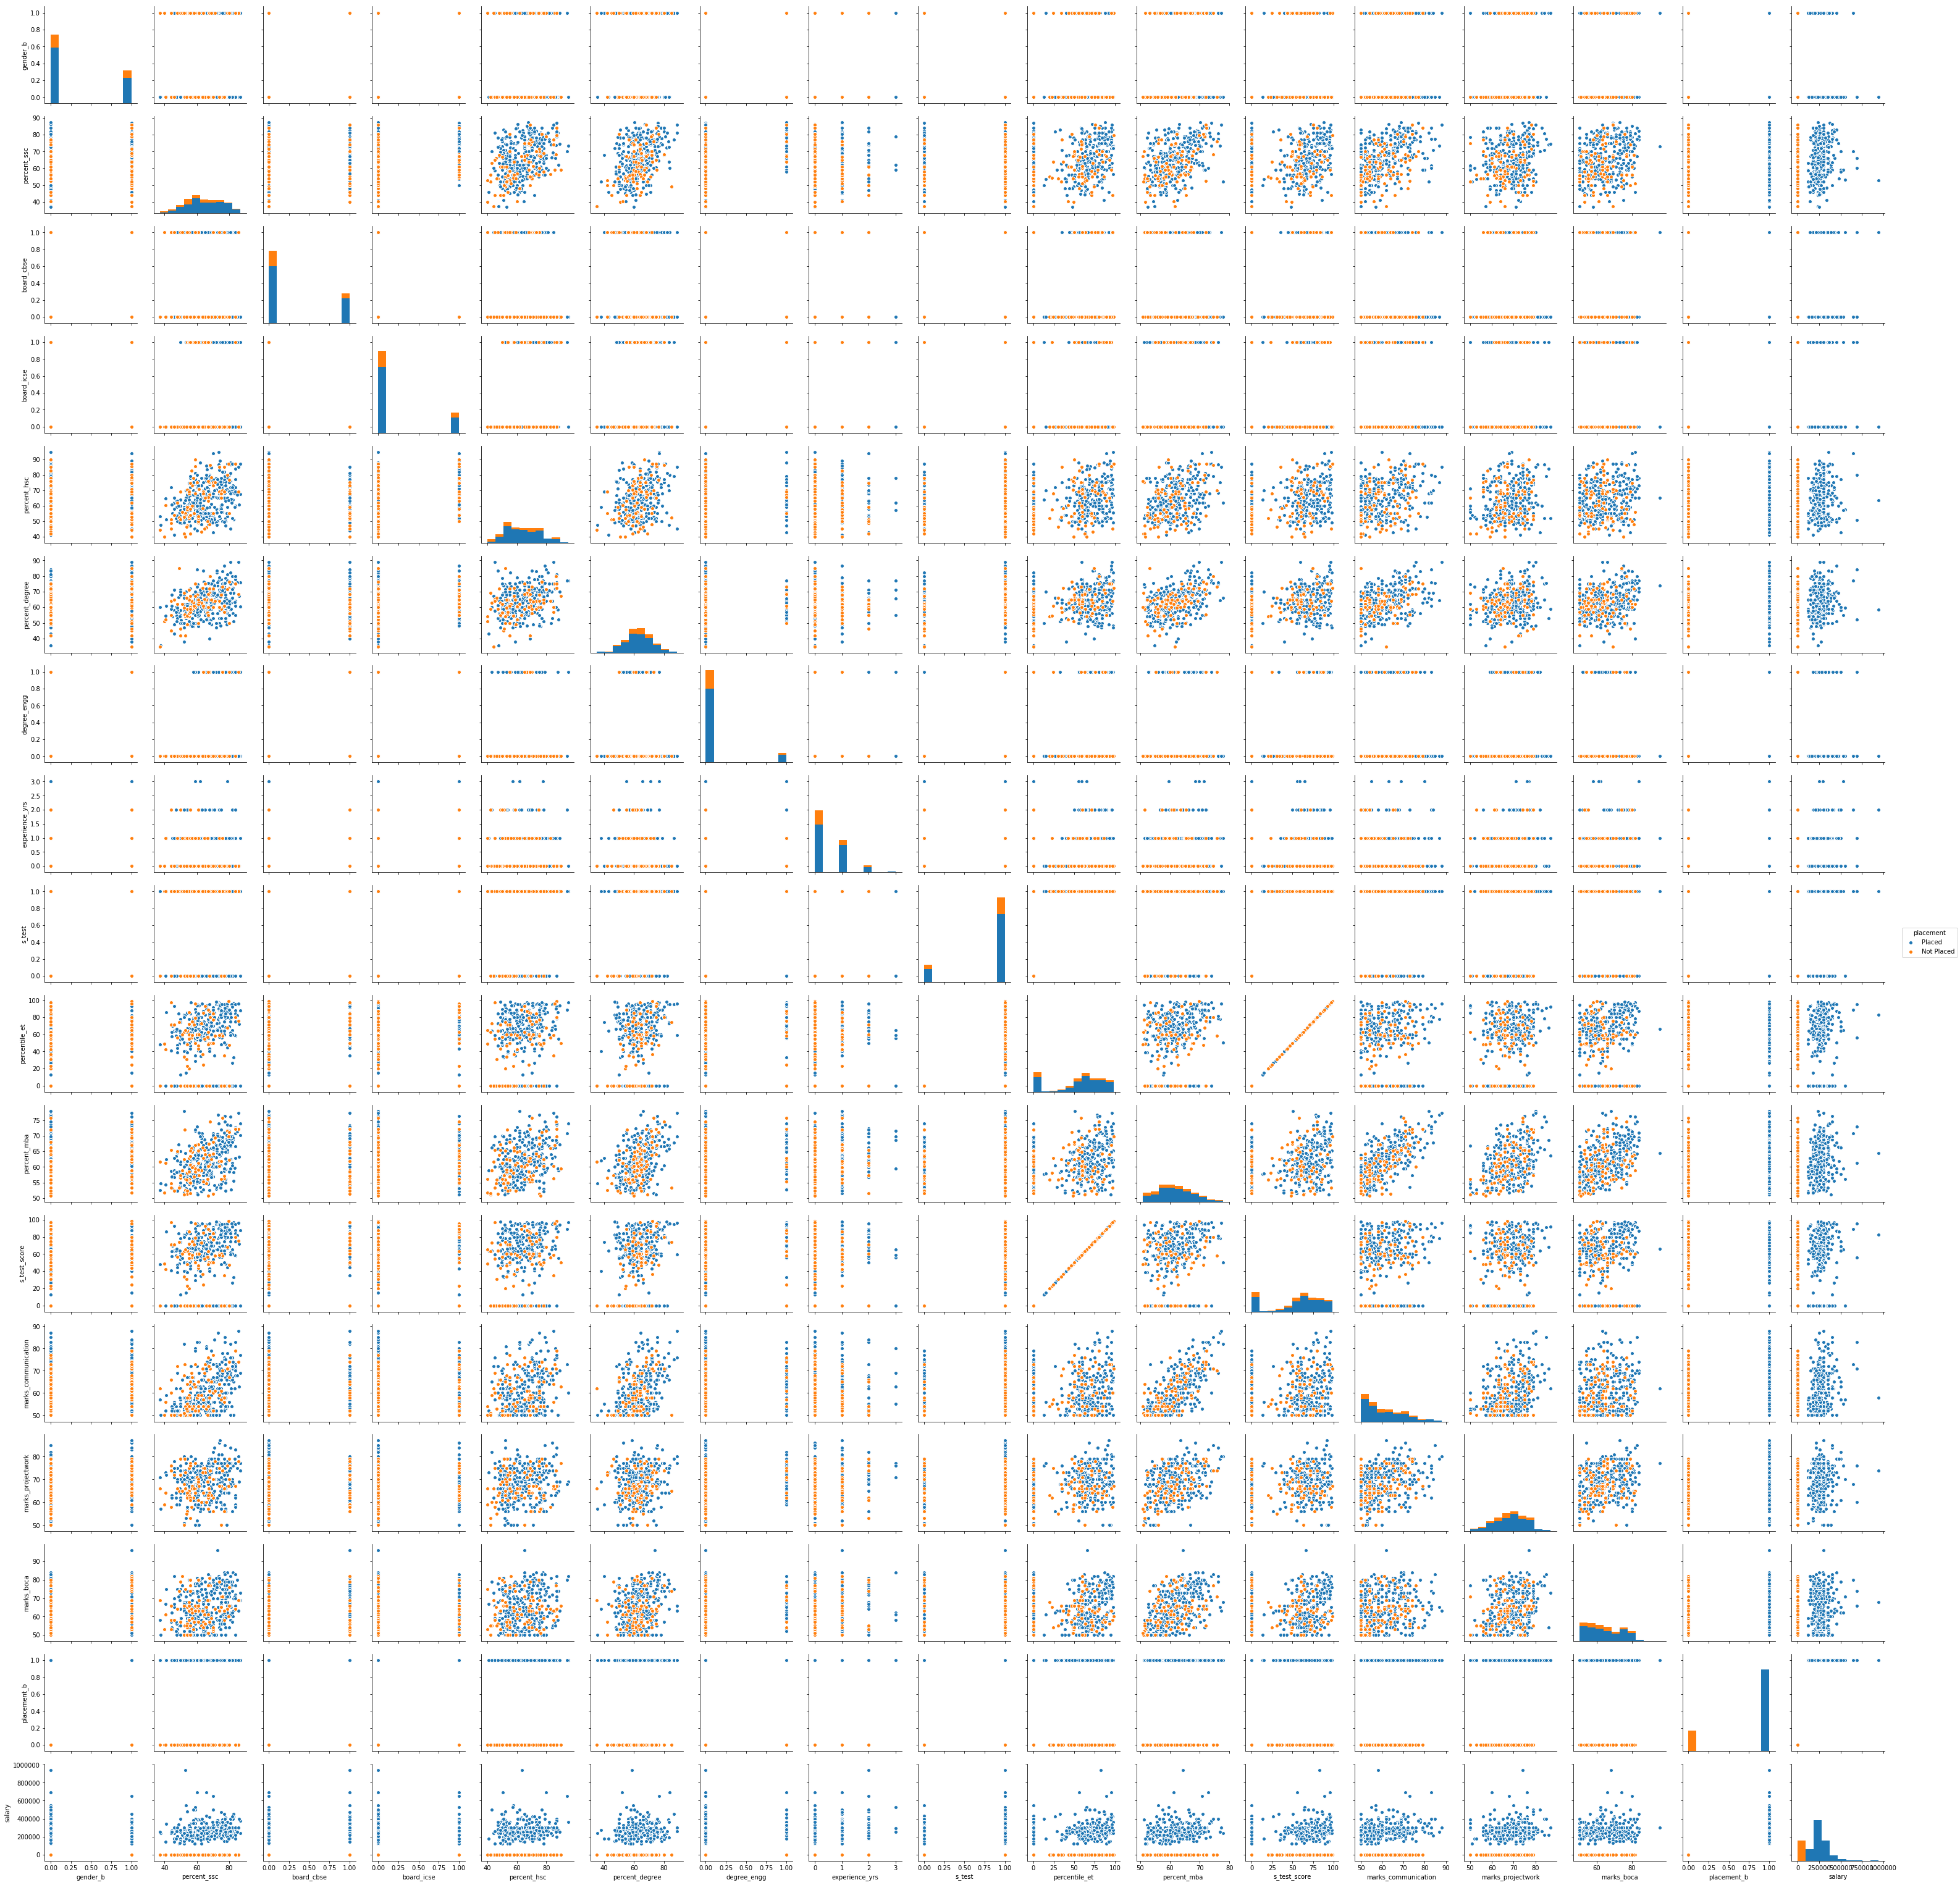

In [21]:
sn.pairplot(filter_df, hue="placement")


## More plots

The below code chunk draws a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

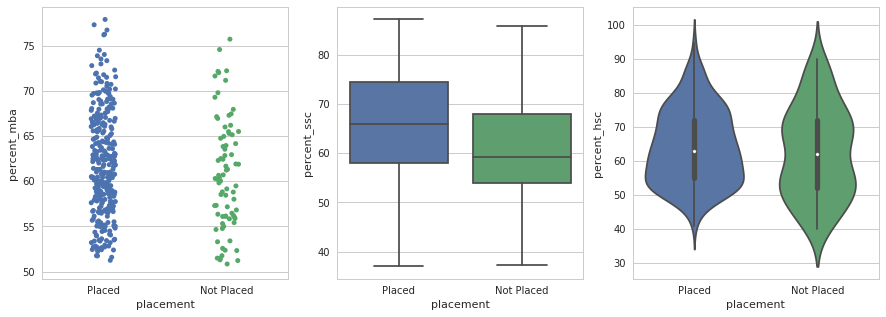

In [22]:
sn.set(style="whitegrid", color_codes=True)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sn.stripplot(x='placement', y='percent_mba', data=filter_df, jitter=True, ax = ax1)
sn.boxplot(x='placement', y='percent_ssc', data=filter_df, ax=ax2)
sn.violinplot(x='placement', y='percent_hsc', data=filter_df, ax=ax3)
# Start here


# Start Here

## Model Approach 1:  With dummy variable coding

### Dummy Variable coding

Remove the response variable from the dataset¶


In [23]:
X_features = set(filter_df.columns)
X_features = list(X_features - set(['gender', 'board_ssc', 'placement', 'placement_b']))

In [24]:
X_features
catColumns

['board_icse',
 'percent_degree',
 'course_degree',
 'marks_projectwork',
 'percentile_et',
 'gender_b',
 'board_cbse',
 'percent_hsc',
 'experience_yrs',
 'salary',
 'entrance_test',
 'stream_hsc',
 'percent_ssc',
 'marks_boca',
 'percent_mba',
 'degree_engg',
 'marks_communication',
 's_test',
 's_test_score',
 'specialization_mba',
 'board_hsc']

['gender',
 'board_ssc',
 'board_hsc',
 'stream_hsc',
 'course_degree',
 'entrance_test',
 'specialization_mba',
 'placement']

In [25]:
categorical_features = ['board_hsc', 'stream_hsc', 'course_degree', 'entrance_test', 'specialization_mba']

In [26]:
#for i in categorical_features:
 #   if filter_df.dtypes.name = 'category'
encoded_X_df = pd.get_dummies(filter_df[X_features], columns = categorical_features, drop_first = True )


In [27]:
encoded_X_df.columns

Index(['board_icse', 'percent_degree', 'marks_projectwork', 'percentile_et',
       'gender_b', 'board_cbse', 'percent_hsc', 'experience_yrs', 'salary',
       'percent_ssc', 'marks_boca', 'percent_mba', 'degree_engg',
       'marks_communication', 's_test', 's_test_score', 'board_hsc_ISC',
       'board_hsc_Others', 'stream_hsc_Commerce', 'stream_hsc_Science',
       'course_degree_Computer Applications', 'course_degree_Engineering',
       'course_degree_Management', 'course_degree_Others',
       'course_degree_Science', 'entrance_test_K-MAT', 'entrance_test_MAT',
       'entrance_test_NotAvailable', 'entrance_test_Others',
       'specialization_mba_Marketing & HR',
       'specialization_mba_Marketing & IB'],
      dtype='object')

In [28]:
pd.options.display.max_columns = None
encoded_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 31 columns):
board_icse                             391 non-null int64
percent_degree                         391 non-null float64
marks_projectwork                      391 non-null int64
percentile_et                          391 non-null float64
gender_b                               391 non-null int64
board_cbse                             391 non-null int64
percent_hsc                            391 non-null float64
experience_yrs                         391 non-null int64
salary                                 391 non-null int64
percent_ssc                            391 non-null float64
marks_boca                             391 non-null int64
percent_mba                            391 non-null float64
degree_engg                            391 non-null int64
marks_communication                    391 non-null int64
s_test                                 391 non-null int64
s_test_score   

In [29]:
Y = encoded_X_df[['salary']]
X = encoded_X_df
X.drop(['salary'], axis = 'columns', inplace = True)
Y.info()
X.head()
Y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 1 columns):
salary    391 non-null int64
dtypes: int64(1)
memory usage: 3.1 KB


,board_icse,percent_degree,marks_projectwork,percentile_et,gender_b,board_cbse,percent_hsc,experience_yrs,percent_ssc,marks_boca,percent_mba,degree_engg,marks_communication,s_test,s_test_score,board_hsc_ISC,board_hsc_Others,stream_hsc_Commerce,stream_hsc_Science,course_degree_Computer Applications,course_degree_Engineering,course_degree_Management,course_degree_Others,course_degree_Science,entrance_test_K-MAT,entrance_test_MAT,entrance_test_NotAvailable,entrance_test_Others,specialization_mba_Marketing & HR,specialization_mba_Marketing & IB
0,0,52.00,65,55.0,0,0,88.00,0,62.00,74,58.80,0,50,1,55.0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
1,1,75.48,70,86.5,0,0,75.33,1,76.33,75,66.28,0,69,1,86.5,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
2,0,66.63,61,0.0,0,0,78.00,0,72.00,59,52.91,1,50,0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
3,0,58.00,66,75.0,0,1,63.00,0,60.00,62,57.80,0,54,1,75.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,54.00,65,66.0,0,1,55.00,1,61.00,67,59.43,1,52,1,66.0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0


,salary
0,270000
1,200000
2,240000
3,250000
4,180000


### Correlation amongst variable

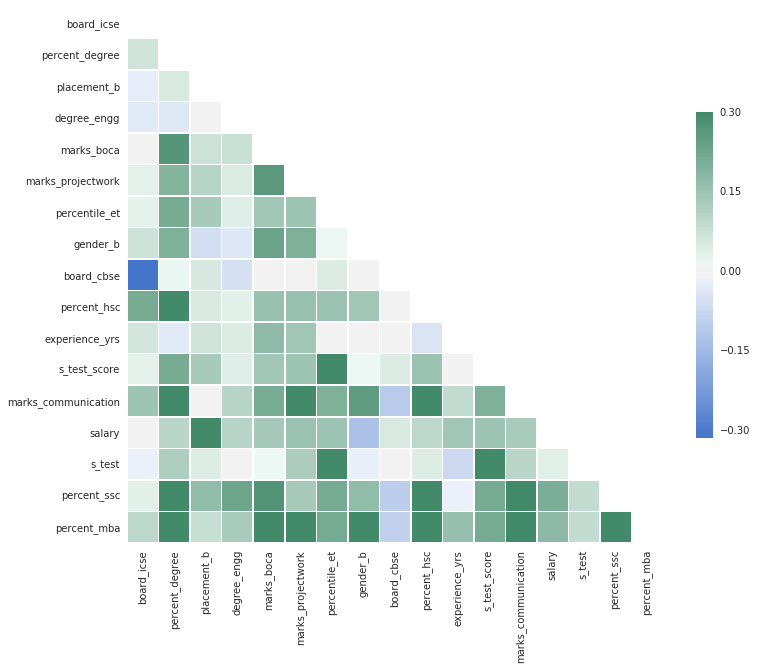

In [30]:
corr = filter_df.filter(numColumns).corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(255, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Train and test data split using Python

The train and test split can also be done using the **sklearn module**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)
type(y_train)

pandas.core.frame.DataFrame

## Model Building: Using the **statsmodel.api** 



Start:  AIC=7361.41
.outcome ~ board_icse + percent_degree + marks_projectwork + 
    percentile_et + gender_b + board_cbse + percent_hsc + experience_yrs + 
    percent_ssc + marks_boca + percent_mba + degree_engg + marks_communication + 
    s_test + s_test_score + board_hsc_ISC + board_hsc_Others + 
    stream_hsc_Commerce + stream_hsc_Science + course_degree_Computer.Applications + 
    course_degree_Engineering + course_degree_Management + course_degree_Others + 
    course_degree_Science + entrance_test_K.MAT + entrance_test_MAT + 
    entrance_test_NotAvailable + entrance_test_Others + specialization_mba_Marketing...HR + 
    specialization_mba_Marketing...IB


Step:  AIC=7361.41
.outcome ~ board_icse + percent_degree + marks_projectwork + 
    percentile_et + gender_b + board_cbse + percent_hsc + experience_yrs + 
    percent_ssc + marks_boca + percent_mba + degree_engg + marks_communication + 
    s_test + s_test_score + board_hsc_ISC + board_hsc_Others + 
    stream_hsc_Comme

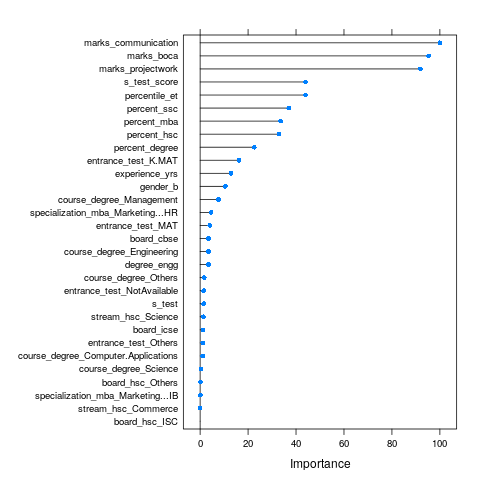

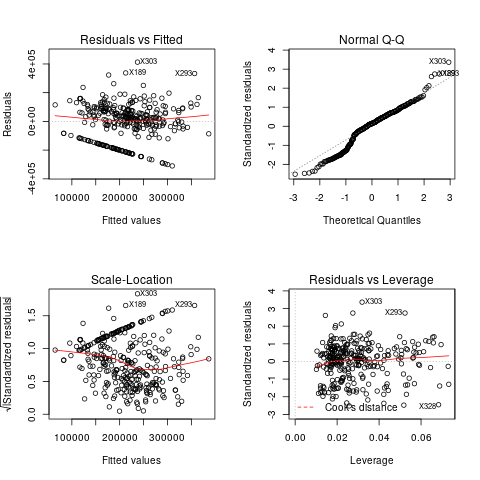

In [33]:
%%R -i X_train -i y_train
library(caret)
X_train = as.data.frame(X_train)
y_train = as.data.frame(y_train)
y_train$salary = as.numeric(y_train$salary)

objControl <- trainControl(method = "none", returnResamp = 'final',
                           summaryFunction = defaultSummary,
                           #summaryFunction = twoClassSummary, defaultSummary
                           classProbs = FALSE,
                           savePredictions = TRUE)
#This parameter is for glmnet. Need not be executed if method  is lmStepAIC
searchGrid <-  expand.grid(alpha = c(1:10)*0.1,
                           lambda = c(1:5)/10)

set.seed(766)

reg_caret_model <- train(X_train,
                      y_train$salary,
                      method = 'lmStepAIC',
                      trControl = objControl,
                      metric = "Rsquared",
                      tuneGrid = NULL,
                      verbose = FALSE)

print(plot(varImp(reg_caret_model, scale = TRUE)))

print(summary(reg_caret_model))
par(mfrow = c(2, 2)) 
print(plot(reg_caret_model$finalModel))

In [51]:
import statsmodels.api as sm
col2use = ['board_icse', 'percent_degree', 'marks_projectwork', 'percentile_et',
       'gender_b', 'board_cbse', 'percent_hsc', 'experience_yrs',
       'percent_ssc', 'marks_boca', 'percent_mba', 'degree_engg',
       'marks_communication', 's_test', 's_test_score', 'board_hsc_ISC',
       'board_hsc_Others', 'stream_hsc_Commerce', 'stream_hsc_Science',
       'course_degree_Computer Applications', 'course_degree_Engineering',
       'course_degree_Management', 'course_degree_Others',
       'course_degree_Science', 'entrance_test_K-MAT', 'entrance_test_MAT',
       'entrance_test_NotAvailable', 'entrance_test_Others',
       'specialization_mba_Marketing & HR',
       'specialization_mba_Marketing & IB']
lg_model_1 = sm.OLS(y_train, sm.add_constant(X_train[col2use])).fit()

#lg_model_1.summary()
lg_model_1.params
lg_model_1.summary2()

const                                 -129158.057174
board_icse                             -21447.998708
percent_degree                            333.135619
marks_projectwork                        2249.280714
percentile_et                             530.185113
gender_b                               -54656.616625
board_cbse                              32052.679129
percent_hsc                              -294.597961
experience_yrs                          21112.045851
percent_ssc                              1989.776057
marks_boca                                515.198454
percent_mba                              1689.872688
degree_engg                            -10811.108744
marks_communication                      -340.574580
s_test                                 -66169.486744
s_test_score                              530.185113
board_hsc_ISC                           27736.494127
board_hsc_Others                        12225.381108
stream_hsc_Commerce                     13857.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Ordinary least squares
===================================================================================================
Model:                          OLS                        Adj. R-squared:               0.125     
Dependent Variable:             salary                     AIC:                          8246.8324 
Date:                           2018-08-21 07:44           BIC:                          8351.6365 
No. Observations:               312                        Log-Likelihood:               -4095.4   
Df Model:                       27                         F-statistic:                  2.644     
Df Residuals:                   284                        Prob (F-statistic):           3.58e-05  
R-squared:                      0.201                      Scale:                        1.6209e+10
---------------------------------------------------------------------------------------------------
                                       Coef.      Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------------------------------------
const                               -129158.0572 75408.6664 -1.7128 0.0878 -277588.8685  19272.7541
board_icse                           -21447.9987 24747.2793 -0.8667 0.3868  -70159.3593  27263.3619
percent_degree                          333.1356  1041.8985  0.3197 0.7494   -1717.6876   2383.9589
marks_projectwork                      2249.2807  1168.9294  1.9242 0.0553     -51.5840   4550.1454
percentile_et                           530.1851   243.2250  2.1798 0.0301      51.4326   1008.9376
gender_b                             -54656.6166 16911.8959 -3.2318 0.0014  -87945.1835 -21368.0498
board_cbse                            32052.6791 24888.9486  1.2878 0.1989  -16937.5366  81042.8948
percent_hsc                            -294.5980   861.8613 -0.3418 0.7327   -1991.0444   1401.8485
experience_yrs                        21112.0459 11283.3741  1.8711 0.0624   -1097.6080  43321.6997
percent_ssc                            1989.7761   902.7392  2.2042 0.0283     212.8675   3766.6846
marks_boca                              515.1985   939.0121  0.5487 0.5837   -1333.1080   2363.5049
percent_mba                            1689.8727  2197.5474  0.7690 0.4425   -2635.6744   6015.4198
degree_engg                          -10811.1087 17711.6254 -0.6104 0.5421  -45673.8247  24051.6073
marks_communication                    -340.5746  1271.7101 -0.2678 0.7890   -2843.7479   2162.5988
s_test                               -66169.4867 46925.3280 -1.4101 0.1596 -158535.0573  26196.0838
s_test_score                            530.1851   243.2250  2.1798 0.0301      51.4326   1008.9376
board_hsc_ISC                         27736.4941 32712.5742  0.8479 0.3972  -36653.3720  92126.3602
board_hsc_Others                      12225.3811 25339.1847  0.4825 0.6298  -37651.0579  62101.8201
stream_hsc_Commerce                   13857.4121 40835.0619  0.3394 0.7346  -66520.3702  94235.1943
stream_hsc_Science                    21278.0309 42643.0644  0.4990 0.6182  -62658.5370 105214.5987
course_degree_Computer Applications  -57243.9065 34183.6980 -1.6746 0.0951 -124529.4622  10041.6492
course_degree_Engineering            -10811.1087 17711.6254 -0.6104 0.5421  -45673.8247  24051.6073
course_degree_Management             -28894.8551 19859.4553 -1.4550 0.1468  -67985.2567  10195.5466
course_degree_Others                  -7227.7169 41287.7850 -0.1751 0.8612  -88496.6176  74041.1837
course_degree_Science                -28346.7465 39461.5911 -0.7183 0.4731 -106021.0546  49327.5616
entrance_test_K-MAT                   10052.1730 45652.1818  0.2202 0.8259  -79807.3977  99911.7436
entrance_test_MAT                    -72137.5464 35788.3706 -2.0157 0.0448 -142581.6630  -1693.4298
entrance_test_NotAvailable           -62988.5704 41949.1876 -1.5015 0.1343 -145559.34


# Not Used



## Model Approach 2:  Without dummy variable coding

In [37]:
import statsmodels.formula.api as smf

To print the name of all the models in any library

In [38]:
#dir(smf)

In [39]:
lg_train_df = X_train.filter(['board_icse', 'percent_degree', 'marks_projectwork', 'percentile_et',
       'gender_b', 'board_cbse', 'percent_hsc', 'experience_yrs',
       'percent_ssc', 'marks_boca', 'percent_mba', 'degree_engg',
       'marks_communication', 's_test', 's_test_score', 'board_hsc_ISC',
       'board_hsc_Others', 'stream_hsc_Commerce', 'stream_hsc_Science',
       'course_degree_Computer Applications', 'course_degree_Engineering',
       'course_degree_Management', 'course_degree_Others',
       'course_degree_Science', 'entrance_test_K-MAT', 'entrance_test_MAT',
       'entrance_test_NotAvailable', 'entrance_test_Others',
       'specialization_mba_Marketing & HR',
       'specialization_mba_Marketing & IB'
                              ], axis = 1)

lg_test_df = X_train.filter(['board_icse', 'percent_degree', 'marks_projectwork', 'percentile_et',
       'gender_b', 'board_cbse', 'percent_hsc', 'experience_yrs',
       'percent_ssc', 'marks_boca', 'percent_mba', 'degree_engg',
       'marks_communication', 's_test', 's_test_score', 'board_hsc_ISC',
       'board_hsc_Others', 'stream_hsc_Commerce', 'stream_hsc_Science',
       'course_degree_Computer Applications', 'course_degree_Engineering',
       'course_degree_Management', 'course_degree_Others',
       'course_degree_Science', 'entrance_test_K-MAT', 'entrance_test_MAT',
       'entrance_test_NotAvailable', 'entrance_test_Others',
       'specialization_mba_Marketing & HR',
       'specialization_mba_Marketing & IB'
                              ], axis = 1)

lg_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 63 to 102
Data columns (total 30 columns):
board_icse                             312 non-null int64
percent_degree                         312 non-null float64
marks_projectwork                      312 non-null int64
percentile_et                          312 non-null float64
gender_b                               312 non-null int64
board_cbse                             312 non-null int64
percent_hsc                            312 non-null float64
experience_yrs                         312 non-null int64
percent_ssc                            312 non-null float64
marks_boca                             312 non-null int64
percent_mba                            312 non-null float64
degree_engg                            312 non-null int64
marks_communication                    312 non-null int64
s_test                                 312 non-null int64
s_test_score                           312 non-null float64
board_hsc_IS

Writing the formula with the required set of variables to be used in model building

In [40]:
#pass_formula = 'C(status) ~ \
#            duration_to_accept_offer+ \
#            notice_period + \
#            percent_difference_ctc + \
#            rex_in_yrs + \
#            age + \
#            C(doj_extended) + \
#            C(offered_band) + \
#            C(joining_bonus) + \
#            C(gender) + \
#            C(candidate_source) + \
#            C(lob) + \
#           C(location)'

In [41]:
#lg_model_2 = smf.glm(formula=pass_formula, data=lg_train_df,family=sm.families.Binomial()).fit()
#lg_model_2.summary()

## Find the significant variables


In [42]:
def get_significant_vars (modelobject):
    var_p_vals_df = pd.DataFrame(modelobject.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [44]:
significant_vars_1 = get_significant_vars(lg_model_1)
significant_vars_1

['percentile_et',
 'gender_b',
 'percent_ssc',
 's_test_score',
 'entrance_test_MAT']

## Model Evaluation


Below is the output from model with dummy variable coding

In [45]:
train_df_predict_1 = lg_model_1.predict(sm.add_constant(X_train))
train_df_predict_1.head()


63     198931.499021
338    265048.084351
354    178071.138675
219    247402.355400
84     191806.444916
dtype: float64

# Residual and other model plots


### Single variable contrib to Regression 

Text(0.5,1,'Linear Regression')

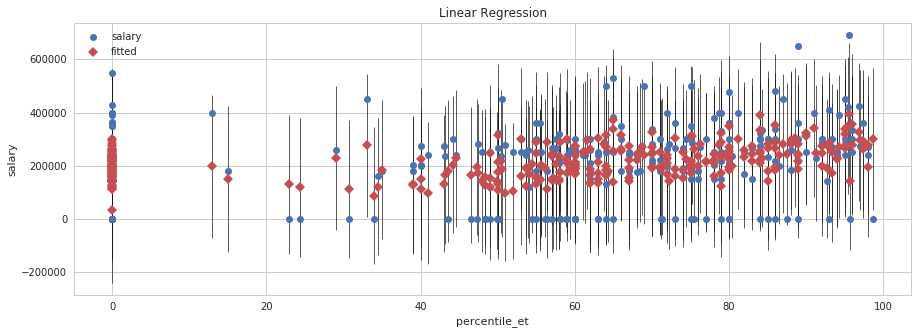

In [55]:
fig, ax = plt.subplots(figsize=(15,5))

fig = sm.graphics.plot_fit(lg_model_1, "percentile_et", ax=ax)
#ax.set_ylabel("Price")
#ax.set_xlabel("Strike Rate")
ax.set_title("Linear Regression")
plt.show()

## Model Plots

### Residual Plot

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
model_fit = lg_model_1
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

Text(0.5,1,'Residuals vs Fitted')

Text(0.5,0,'Fitted values')

Text(0,0.5,'Residuals')

Text(245319,404681,'303')

Text(223165,326835,'189')

Text(315275,-315275,'385')

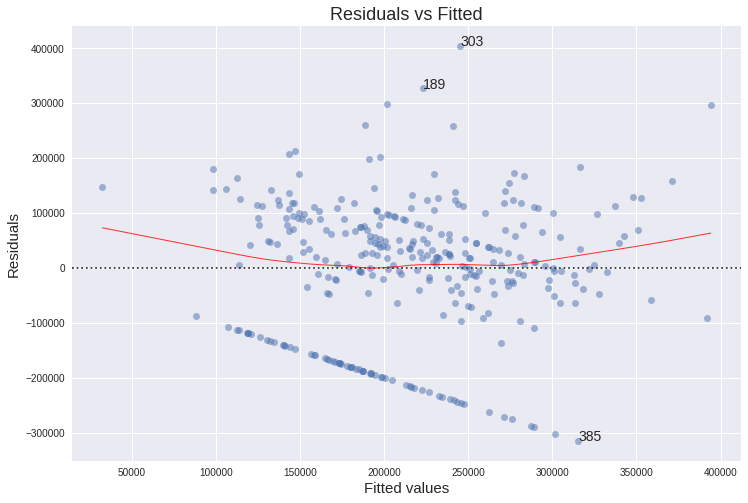

In [66]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sn.residplot(model_fitted_y, 'salary', data=y_train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

## Residual QQ Plot

Text(0.5,1,'Normal Q-Q')

Text(0.5,0,'Theoretical Quantiles')

Text(0,0.5,'Standardized Residuals')

Text(2.72708,3.32059,'240')

Text(2.48985,2.70965,'276')

Text(2.34222,-2.65103,'61')

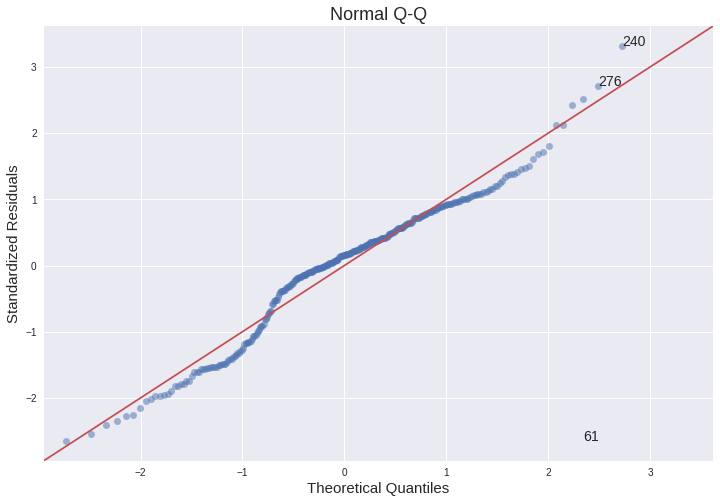

In [68]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

## Standardised Residuals vs Fitted Values

Text(0.5,1,'Scale-Location')

Text(0.5,0,'Fitted values')

Text(0,0.5,'$\\sqrt{|Standardized Residuals|}$')

Text(232885,1.82225,'240')

Text(291255,1.6461,'276')

Text(98524.7,1.6282,'61')

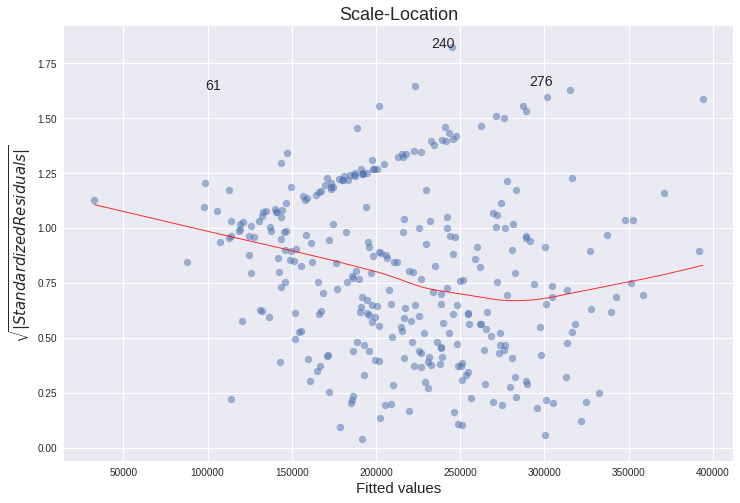

In [70]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sn.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

## Residuals vs Leverage

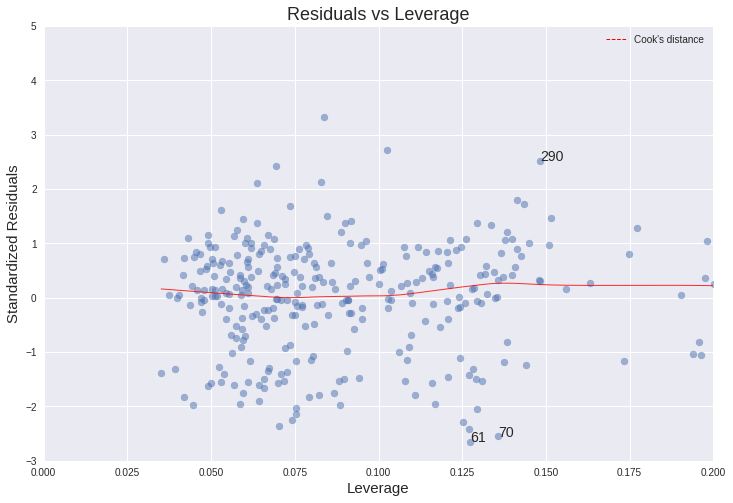

In [72]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sn.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

## VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices("salary ~" + "board_icse+percent_degree+marks_projectwork+percentile_et+gender_b", 
                 pd.concat([y_train,X_train], axis ='columns'), return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head()

,VIF Factor,features
0,123.437212,Intercept
1,1.008845,board_icse
2,1.106967,percent_degree
3,1.106035,marks_projectwork
4,1.071148,percentile_et


### 2. The prediction on test data.

## Test metrics

### vs Mean models

In [93]:
predicted = lg_model_1.predict(sm.add_constant(X_test[X_train.columns]))

xx = pd.DataFrame({"Pred":predicted, "actual":y_test.salary})

from sklearn.metrics import mean_squared_error, mean_absolute_error

xx.loc[xx.actual == 0, 'Pred'] = 0
xx['actual_mean'] = xx.actual.mean()

print("RMSE = {}".format(mean_squared_error(xx.Pred, xx.actual) ** 0.5))
print("MAE = {}".format(mean_absolute_error(xx.Pred, xx.actual)))

print("MAE Mean Model = {}".format(mean_absolute_error(xx.actual_mean, xx.actual)))
print("RMSE Mean Model = {}".format(mean_squared_error(xx.actual_mean, xx.actual) ** 0.5))

RMSE = 121746.19932571726
MAE = 70965.11286061477
MAE Mean Model = 95059.44560166638
RMSE Mean Model = 146096.75498455294
